In [6]:
import face_recognition
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime


# step 1
## Loading image and converting to RGB
the face recognition package consists of load image function that loads the image. once imported the image has to be convertd to RGB.

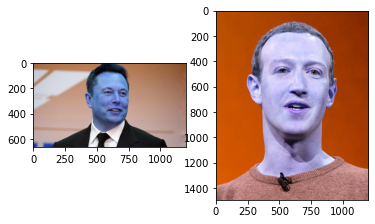

In [7]:
imgElon = face_recognition.load_image_file("ImagesBasic/elon-musk.jpg")
imgElon = cv2.cvtColor(imgElon, cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file("ImagesBasic/elon-test.jpg")
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)
imgTest2 = face_recognition.load_image_file("ImagesBasic/mark test.jpg")
imgTest2 = cv2.cvtColor(imgTest2, cv2.COLOR_BGR2RGB)
fig , (ax1, ax2) = plt.subplots(nrows=1,ncols =2)
ax1.imshow(imgElon)
ax2.imshow(imgTest2)

# Step 2
## Find Faces Locations and encodings
In the second step we will use the true functionality of the face recognition library. First we will find the faces in our images . This is done using HOG (Histogram of Oriented Gradients) at the backend. Once we have the face they are warped to remove unwanted rotations. Then the image is feed to a pretrained neural network that out puts 128 measurements that are unique to that particular face. The parts that the model measures is not known as this is what the model learns by itself when it was trained. Lucky for us all this is done is just 2 lines of code. Once we have the face locations and the encodings we can draw rectangles around our faces.

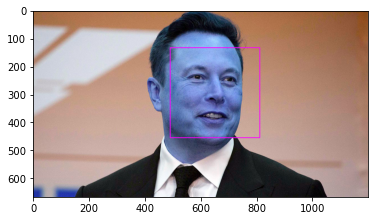

In [8]:

faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]
elonImage = cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2) # top, right , bottom , left
plt.imshow(elonImage)

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]
elonTest = cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2) # top, right , bottom , left
cv2.imshow("elon",elonTest)

faceLocTest2 = face_recognition.face_locations(imgTest2)[0]
encodeTest2 = face_recognition.face_encodings(imgTest2)[0]
markTest = cv2.rectangle(imgTest2,(faceLocTest2[3],faceLocTest2[0]),(faceLocTest2[1],faceLocTest2[2]),(255,0,255),2) # top, right , bottom , left
cv2.imshow("elon",markTest)



cv2.waitKey(1000)
cv2.destroyAllWindows()


# Step 3
## Compare faces and distance

Once we have the encodings for both faces, then we can compare these 128 measurements of these two faces to find similarities. To compare the package uses one of the most common machine Learning methods linear SVM classifier. We can use the compare_faces function to find if the faces match. This function returns True or False. Similarly we can use the face_distance function to find how likely is the faces match in terms of numbers. This is helpul particularly when there are multiple faces to detect from.

In [9]:
result = face_recognition.compare_faces([encodeElon], encodeTest2)
faceDis = face_recognition.face_distance([encodeElon] , encodeTest2)
cv2.imshow("show",imgTest2)
cv2.putText(imgTest2,f'{result}{round(faceDis[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,255),3)
cv2.waitKey(10000)
cv2.destroyAllWindows()

# Attendance Project
 Now using the methods we have seen above, we will develop system where the user is autometically logged when they are detected in the camera. we will store the name along with the time when they appeared.

# Importing Images 
 As we have imported before er can the same face_recignition.load_image_file() function ro import our images. But when we have multiple images, importing them individually can become messy.
 therefore we will write a script to import all images in given folder al once. For this we will need the as library so we will import that first. we will store all the images in one list and their name in another. 


In [10]:
import os

In [11]:
path = 'ImageAttendance'
images = [] # List contsining all the images
className = [] # List containing all the corresponding class name 
mylist = os.listdir(path)
print("total class detected:", len(mylist))
for x, cl in enumerate(mylist):
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    className.append(os.path.splitext(cl)[0])
    

total class detected: 6


# Computer encodings
Now that we have a list of image we can iterate through those and create a corresponding encoded list for known faces. To do this we will create a function. as earlier we will first convert it into RGB and then find its encoding using the face_recognition() function. Then er eill append each encoding to our list.

In [12]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [13]:
def markattendence(name):
    with open("attendence.csv", 'r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtstr = now.strftime(' %H:%M:%S')
            f.writelines(f'\n{name},{dtstr}')
            

Now we can simply call this function with the images list as the input arguments

In [14]:
encodingListKnown = findEncodings(images)
print('encodings complete')

encodings complete


# The while loop 
The while loop is created to run the webcam. But before the while loop we have to create a video capture object so that we can grab frames frok the webcam

In [15]:
cap = cv2.VideoCapture(0)

# Webcam image
First we will read the image from the webcam and than resize it to quarter the size. This is done to increase the speed of the system. Even though the image being used is 1\4 th of orginal, we will still use the orginal size while displaying. Next we will convert it to RGB

In [ ]:
while True:
    success , img = cap.read()
    imgS = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    imgS = cv2.cvtColor(imgS , cv2.COLOR_BGR2RGB)
    faceCurFrame =face_recognition.face_locations(imgS)
    encodeCurFrame = face_recognition.face_encodings(imgS , faceCurFrame)
    for encodeFace , faceLoc in zip(encodeCurFrame, faceCurFrame):
        matches = face_recognition.compare_faces(encodingListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodingListKnown, encodeFace)
        #print(faceDis)
        matchIndex = np.argmin(faceDis)
        if matches[matchIndex]:
            name = className[matchIndex].upper()
            #print(name)
            y1,x2,y2,x1 = faceLoc
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markattendence(name)
    cv2.imshow("webcam", img)
    cv2.waitKey(1)
    
        
    